In [1]:
### Task to predict whether person has ckd or notckd??

## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:/Users/ganes/projects/chronicproj/djangoMLDeployment/src/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

    1. Features:
    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - haemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    classification - class

In [5]:
### rename column names to make it more user-friendly

In [6]:
'''columns=pd.read_csv('C:/Users/ganes/projects/chronic/drive-download-20230312T132507Z-001/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']'''

"columns=pd.read_csv('C:/Users/ganes/projects/chronic/drive-download-20230312T132507Z-001/data_description.txt',sep='-')\ncolumns=columns.reset_index()\ncolumns.columns=['cols','abb_col_names']"

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
#df.columns=columns['abb_col_names'].values

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

    As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
    change to numerical dtype.

In [11]:
#features=['red blood cell count','packed cell volume','white blood cell count']

In [12]:
'''def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')'''

"def convert_dtype(df,feature):\n    df[feature] = pd.to_numeric(df[feature], errors='coerce')"

In [13]:
'''for feature in features:
    convert_dtype(df,feature)'''

'for feature in features:\n    convert_dtype(df,feature)'

In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

    Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't 
    help us to find any insights from the data

In [15]:
#df.drop(["id"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [16]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [17]:
cat_col,num_col=extract_cat_num(df)

In [18]:
cat_col

[]

In [19]:
num_col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [20]:
### total unique categories in our categorical features to check if any dirtiness in data or not

In [21]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

In [22]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

    So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [23]:
#Replace incorrect values
'''
df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')'''

"\ndf['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)\n\ndf['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')\n\ndf['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')"

In [24]:
##df['diabetes mellitus'] = [float(str(i).replace(",", "")) for i in df['diabetes mellitus']]

In [25]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

    Looks good now apart from the NaNs

In [26]:
len(num_col)

14

###  Checking features distribution

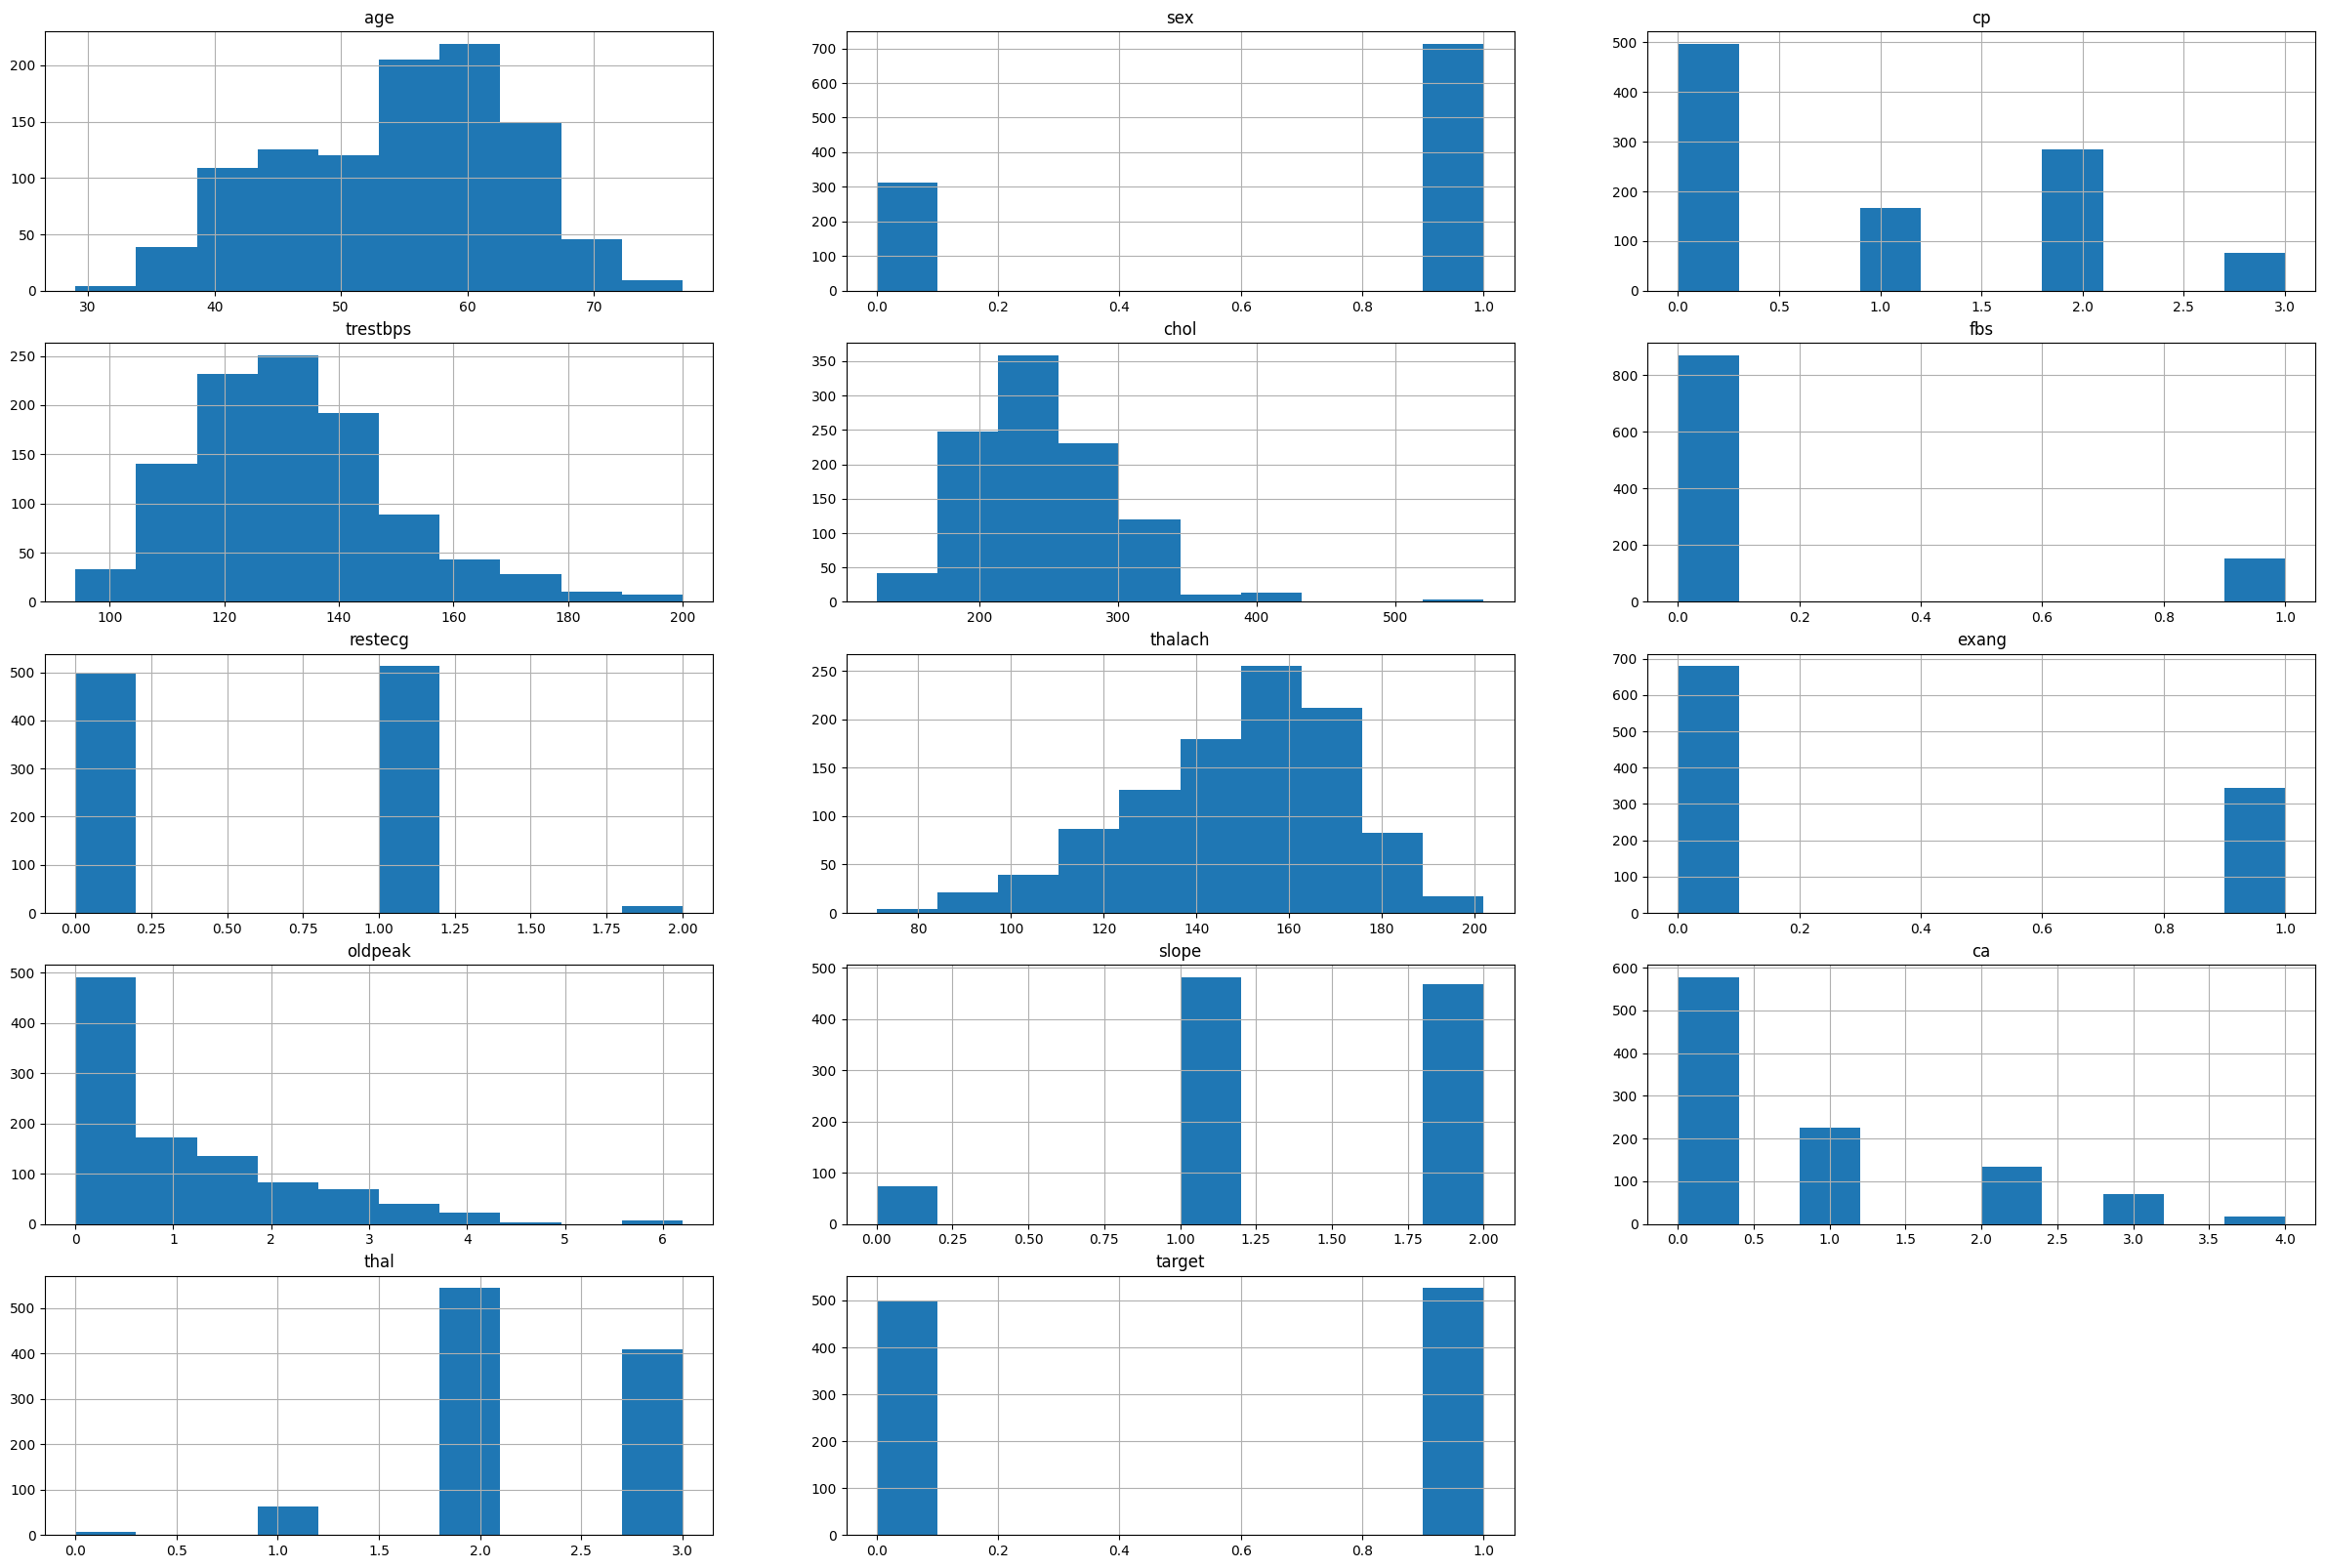

In [27]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Now, let's check the label distribution for categorical data

In [28]:
len(cat_col)

0

In [29]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    df[feature].hist()

<Figure size 2000x2000 with 0 Axes>

    A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

In [30]:
'''sns.countplot(x='class',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")'''

'sns.countplot(x=\'class\',data=df)\nplt.xlabel("classification")\nplt.ylabel("Count")\nplt.title("target Class")'

In [31]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

###  7. Correlations

<AxesSubplot: >

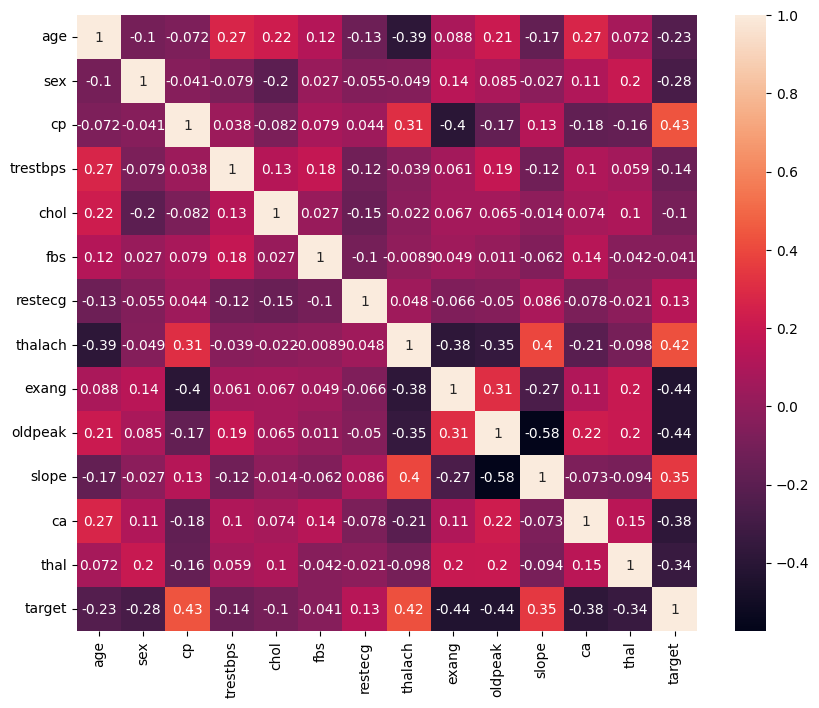

In [32]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [33]:
#df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

### Let's check for Positive correlation and its impact on classes¶

In [34]:
import plotly.express as px

In [35]:
#px.violin(df,y='red blood cell count',x="class", color="class")

In [36]:
#px.scatter(df,'haemoglobin','packed cell volume')

In [37]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

'''grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()'''

'grid=sns.FacetGrid(df, hue="class",aspect=2)\ngrid.map(sns.kdeplot, \'red blood cell count\')\ngrid.add_legend()'

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [38]:
# Defining violin and scatter plot & kde_plot functions
'''def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="class")
    return fig.show()'''

'def violin(col):\n    fig = px.violin(df, y=col, x="class", color="class", box=True)\n    return fig.show()\n\ndef scatters(col1,col2):\n    fig = px.scatter(df, x=col1, y=col2, color="class")\n    return fig.show()'

In [39]:
'''def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()'''

'def kde_plot(feature):\n    grid = sns.FacetGrid(df, hue="class",aspect=2)\n    grid.map(sns.kdeplot, feature)\n    grid.add_legend()'

In [40]:
'''kde_plot('red blood cell count')'''

"kde_plot('red blood cell count')"

In [41]:
#kde_plot('haemoglobin')

In [42]:
#scatters('red blood cell count', 'packed cell volume')

In [43]:
#scatters('red blood cell count', 'haemoglobin')

In [44]:
#scatters('haemoglobin','packed cell volume')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [45]:
#violin('red blood cell count')

In [46]:
#violin('packed cell volume')

###  Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [47]:
#scatters('red blood cell count','albumin')

    Clearly, albumin levels of above 0 affect ckd largely

In [48]:
#scatters('packed cell volume','blood urea')

    Packed cell volume >= 40 largely affects to be non ckd

In [49]:
'''fig = px.bar(df, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()'''

'fig = px.bar(df, x="specific gravity", y="packed cell volume",\n             color=\'class\', barmode=\'group\',\n             height=400)\nfig.show()'

    Clearly, specific gravity >=1.02 affects non ckd

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
df.isna().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
cat_col

[]

In [53]:
#df['red blood cells'].hist()

In [54]:
data=df.copy()

In [55]:
### filling missing with Random value

#### Random Value Imputation

In [56]:
#data['red blood cells'].isnull().sum()

In [57]:
#data['red blood cells'].dropna().sample()

In [58]:
#random_sample=data['red blood cells'].dropna().sample(data['red blood cells'].isnull().sum())
#random_sample

In [59]:
#random_sample.index

In [60]:
#data[data['red blood cells'].isnull()].index

In [61]:
#random_sample.index=data[data['red blood cells'].isnull()].index

In [62]:
#random_sample.index

In [63]:
#random_sample

In [64]:
#data.loc[data['red blood cells'].isnull(),'red blood cells']=random_sample

In [65]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
#data['red blood cells'].hist()

In [67]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample



In [68]:
data[cat_col].isnull().sum()

Series([], dtype: float64)

In [69]:
### as rest of the features has less missing values,so I can fill it using mode concept

In [70]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [71]:
for col in cat_col:
    impute_mode(col)

In [72]:
data[cat_col].isnull().sum()

Series([], dtype: float64)

In [73]:
data[num_col].isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [74]:
### lets fill missing values in Numerical features using Random value Imputation

In [75]:
for col in num_col:
    Random_value_imputation(col)

In [76]:
data[num_col].isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### feature Encoding

In [77]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))
    

In [78]:
#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()

In [81]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [82]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Feature Importance

In [83]:

#SelectKBest-to select k best features

In [84]:
#chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
#based on that,it will actually order all the features

In [85]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [86]:
ind_col=[col for col in data.columns if col!='target']
dep_col='target'

In [87]:
X=data[ind_col]
y=data[dep_col]

In [88]:

ordered_rank_features=SelectKBest(score_func=chi2,k=13)
ordered_feature=ordered_rank_features.fit(X,y)

In [89]:
ordered_feature

SelectKBest(k=13, score_func=<function chi2 at 0x000001FAAA44B250>)

In [90]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([ 81.42536762,  24.37365008, 217.82392171,  45.97406854,
       110.72336371,   1.47754962,   9.73934262, 650.00849349,
       130.47092725, 253.65346109,  33.67394807, 210.62591949,
        19.37346461])

In [91]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,81.425368
1,24.373650
2,217.823922
3,45.974069
4,110.723364
5,1.477550
6,9.739343
7,650.008493
8,130.470927
9,253.653461


In [92]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [93]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [94]:
features_rank

,0,Score
0,age,81.425368
1,sex,24.373650
2,cp,217.823922
3,trestbps,45.974069
4,chol,110.723364
5,fbs,1.477550
6,restecg,9.739343
7,thalach,650.008493
8,exang,130.470927
9,oldpeak,253.653461


In [95]:
#Higher the score is,more important feature is 

In [96]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,81.425368
1,sex,24.373650
2,cp,217.823922
3,trestbps,45.974069
4,chol,110.723364
5,fbs,1.477550
6,restecg,9.739343
7,thalach,650.008493
8,exang,130.470927
9,oldpeak,253.653461


In [97]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
7,thalach,650.008493
9,oldpeak,253.653461
2,cp,217.823922
11,ca,210.625919
8,exang,130.470927
4,chol,110.723364
0,age,81.425368
3,trestbps,45.974069
10,slope,33.673948
1,sex,24.373650


In [98]:
x_new=features_rank.nlargest(10,'Score')['Features'].values

In [99]:
sc=np.array(x_new)

In [100]:
selected_columns=data[sc]
print(selected_columns)
selected_columns.dtypes

      thalach  oldpeak  cp  ca  exang  chol  age  trestbps  slope  sex
0         168      1.0   0   2      0   212   52       125      2    1
1         155      3.1   0   0      1   203   53       140      0    1
2         125      2.6   0   0      1   174   70       145      0    1
3         161      0.0   0   1      0   203   61       148      2    1
4         106      1.9   0   3      0   294   62       138      1    0
...       ...      ...  ..  ..    ...   ...  ...       ...    ...  ...
1020      164      0.0   1   0      1   221   59       140      2    1
1021      141      2.8   0   1      1   258   60       125      1    1
1022      118      1.0   0   1      1   275   47       110      1    1
1023      159      0.0   0   0      0   254   50       110      2    0
1024      113      1.4   0   1      0   188   54       120      1    1

[1025 rows x 10 columns]


thalach       int64
oldpeak     float64
cp            int64
ca            int64
exang         int64
chol          int64
age           int64
trestbps      int64
slope         int64
sex           int64
dtype: object

### Model Building

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_columns,y,train_size=0.75)

In [102]:
print(X_train.shape)
print(X_test.shape)

(768, 10)
(257, 10)


In [103]:
X_train.value_counts()

thalach  oldpeak  cp  ca  exang  chol  age  trestbps  slope  sex
202      0.0      1   0   0      204   29   130       2      1      4
131      1.8      2   0   1      309   64   125       1      1      4
173      0.0      2   4   0      175   38   138       2      1      4
118      1.0      0   1   1      275   47   110       1      1      4
124      1.0      0   3   0      289   57   165       1      1      4
                                                                   ..
125      0.0      3   0   0      273   59   160       2      1      1
161      0.0      0   1   1      255   52   128       2      1      1
178      1.2      3   0   0      298   52   152       1      1      1
161      0.5      0   0   0      234   59   135       1      1      1
71       1.0      0   0   0      237   67   120       1      1      1
Length: 299, dtype: int64

In [104]:
## check whether dataset is imbalance or not
y_train.value_counts()

1    398
0    370
Name: target, dtype: int64

In [105]:
### Lets find best model using Hyperparameter optimization

In [106]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [107]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [108]:
## Hyper Parameter Optimization with respect to XGBoost
'''
params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}'''

'\nparams={\n "learning_rate"    : [0.05, 0.20, 0.25 ] ,\n "max_depth"        : [ 5, 8, 10, 12],\n "min_child_weight" : [ 1, 3, 5, 7 ],\n "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],\n "colsample_bytree" : [ 0.3, 0.4, 0.7 ]\n    \n}'

In [109]:
#from sklearn.model_selection import RandomizedSearchCV

In [110]:
'''from xgboost import XGBClassifier
classifier=XGBClassifier()'''

'from xgboost import XGBClassifier\nclassifier=XGBClassifier()'

In [111]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [112]:
#random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [113]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
#random_search.best_estimator_

In [115]:
#random_search.best_params_

In [116]:
'''classifier=RandomForestClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
'''
## we have got this model on the basis of cross valudation & hyper-parameter optimization

"classifier=RandomForestClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.25, max_delta_step=0, max_depth=5,\n              min_child_weight=1, monotone_constraints='()',\n              n_estimators=100, n_jobs=2, num_parallel_tree=1,\n              objective='binary:logistic', random_state=0, reg_alpha=0,\n              reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', use_label_encoder=False,\n              validate_parameters=1, verbosity=None)\n"

In [117]:
#classifier.fit(X_train,y_train)

In [118]:
y_pred=model.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [120]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[129   0]
 [  0 128]]


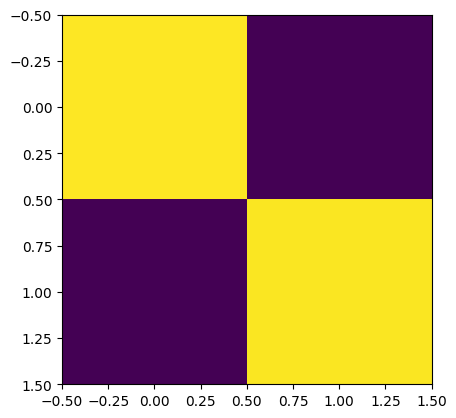

In [121]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [122]:
accuracy_score(y_test, y_pred)

1.0

In [123]:
from joblib import dump

In [124]:
dump(model,'./../savedModels/model2.joblib')

['./../savedModels/model2.joblib']